In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# 1. PolyNomial Regression

### 1. Make Data

In [2]:
NUM_DATASETS = 50   # DATASET을 변경해가면서 테스트할 것이다.
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
Ntrain = int(0.9 * N)

In [3]:
np.random.seed(2)

In [4]:
def make_poly(x, D):
    # 데이터 개수
    N = len(x)
    
    # 데이터 차원
    X = np.empty((N, D+1))
    for d in range(D+1):
        X[:, d] = x**d
        if d > 1:
            X[:,d] = (X[:,d] - X[:, d].mean()) / X[:, d].std()
    return X

In [5]:
#true_function
def f(x):
    return np.sin(x)

In [6]:
#true_function
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

In [7]:
# X is true data, f_X is true function(sinx)
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

In [8]:
# Xpoly
Xpoly = make_poly(X, MAX_POLY)

In [9]:
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

### 2. Fit and Predict

In [10]:
# 모델
model = LinearRegression()

In [11]:
# 데이터셋 50개에 대하여 테스트
for k in range(NUM_DATASETS):
    
    # 관측 값
    Y = f_X + np.random.randn(N)*NOISE_VARIANCE

    Xtrain = Xpoly[:Ntrain]
    Ytrain = Y[:Ntrain]
    
    Xtest = Xpoly[Ntrain:]
    Ytest = Y[Ntrain:]

    # Polynomial 개수를 조정하면서 train, test
    for d in range(MAX_POLY):
        # 1. plot 
        x_axis_poly = make_poly(x_axis, d+1)
        prediction_axis = model.predict(x_axis_poly)
        prediction_curves[:,k,d] = prediction_axis
        
        # 2. fit and predict
        model.fit(Xtrain[:,:d+2], Ytrain)
        predictions = model.predict(Xpoly[:,:d+2])
        
        train_prediction = predictions[:Ntrain]
        test_prediction = predictions[Ntrain:]

        # k 번째 데이터 셋에 대해서 저장
        train_predictions[:,k,d] = train_prediction

        train_score = mse(train_prediction, Ytrain)
        test_score = mse(test_prediction, Ytest)

        train_scores[k,d] = train_score
        test_scores[k,d] = test_score

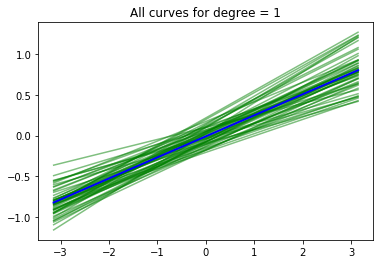

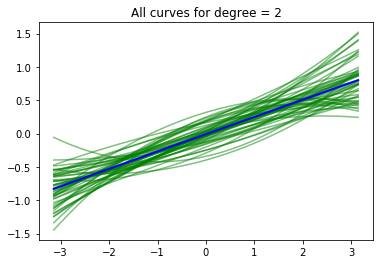

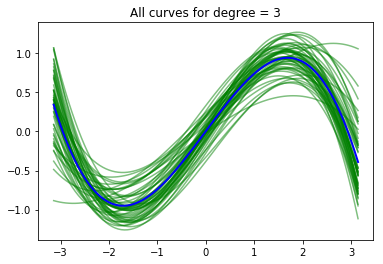

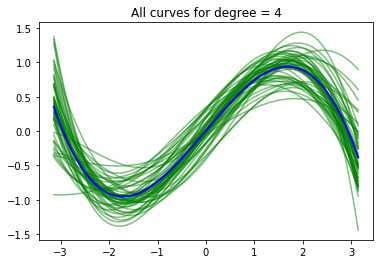

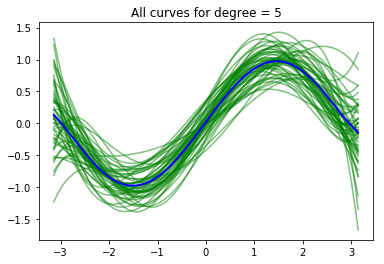

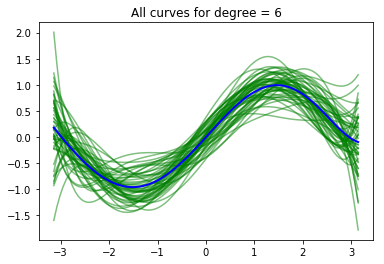

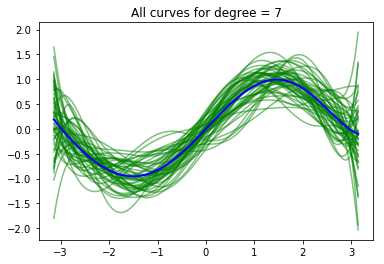

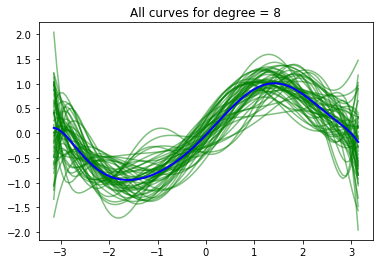

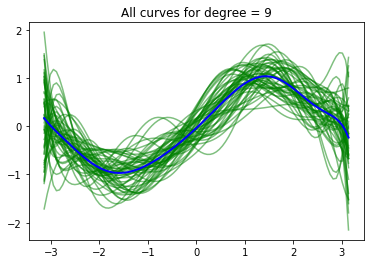

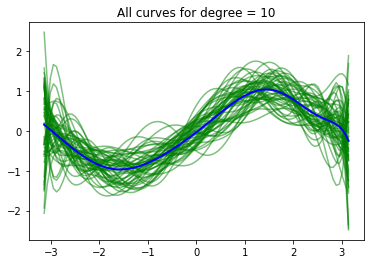

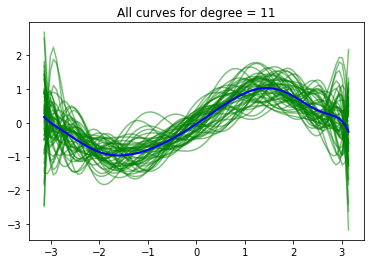

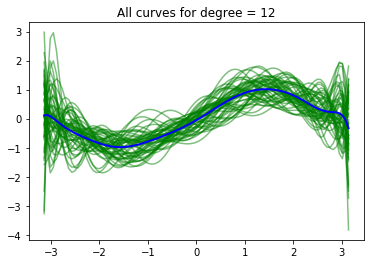

In [14]:
# show all prediction curves for each polynomial degree
# along with the mean curve
for d in range(MAX_POLY):
    for k in range(NUM_DATASETS):
        plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
    plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)
    plt.title("All curves for degree = %d" % (d+1))
    plt.show()

### 3. Bias and Variance

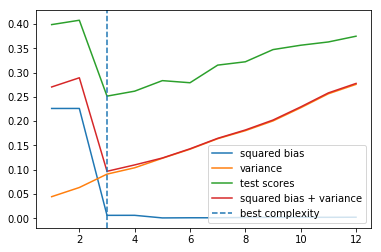

In [12]:
# 1. Bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
    for i in range(Ntrain):
        # d차원의 polynomial regression 모델의 각 train 데이터에 대한 예측 평균(50개의 데이터셋에 대해서) - E(f_hat)
        avg_train_prediction[i,d] = train_predictions[i,:,d].mean() 
        # (E(f_hat) - E(f))^2
    squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean() # bias

# 2. Variance
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
    for i in range(Ntrain):
        # f_hat - f_bar
        delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
        variances[i,d] = delta.dot(delta) / N
variance = variances.mean(axis=0)

# make bias-variance plots
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

- squared bias + variance = test score

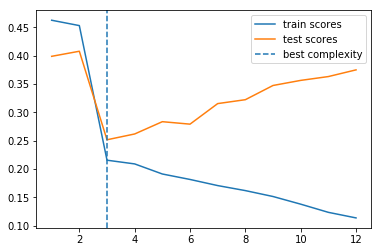

In [13]:
# train score vs test score
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()